In [ ]:
import json
import re
import Levenshtein
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
# Import of Immobiliare json file
with open('/content/drive/MyDrive/Progetto Data Management/Data/immobiliare.json', 'r') as file:
    immobiliare = json.load(file)

# Import of Subito json file
with open('/content/drive/MyDrive/Progetto Data Management/Data/subito.json', 'r') as file:
    subito = json.load(file)

# Import if "Stradario" json file
with open('/content/drive/MyDrive/Progetto Data Management/Data/quartieri.json', 'r') as file:
    quartieri = json.load(file)

# Import of final dataset json file
with open('/content/drive/MyDrive/Progetto Data Management/Data/integratedDB.json', 'r') as file:
    integratedDB = json.load(file)


###QUARTIERI

In [ ]:
quartieri.keys()

dict_keys(['brera', 'stephenson', 'san-siro_municipio-7', 'villapizzone', 'de-angeli-monte-rosa', 'guastalla_municipio-1', 'roserio', 'loreto_municipio-2', 'tibaldi', 'niguarda-ca-granda', 'cantalupa_municipio-6', 'parco-nord', 'parco-dei-navigli', 'buenos-aires-venezia', 'cassina-triulza', 'barona', 'corsica', 'cantalupa_milano', 'bande-nere', 'washington', 'pagano', 'moncucco', 'selinunte', 'ticinese', 'quarto-cagnino', 'san-cristoforo_milano', 'qt-8', 'bovisasca', 'greco', 'adriano', 'giardini-porta-venezia', 'chiaravalle_municipio-5', 'centrale', 'tortona_municipio-6', 'xxii-marzo', 'isola', 'ortomercato', 'gratosoglio-ticinello', 'sarpi', 'figino', 'dergano', 'porta-romana_municipio-4', 'bicocca', 'trenno', 'parco-delle-abbazie', 'comasina', 'portello', 'farini_municipio-9', 'magenta-san-vittore', 'parco-agricolo-sud', 'bruzzano', 'mecenate', 'padova_municipio-2', 'quinto-romano', 'morivione', 'sacco_municipio-8', 'ripamonti', 'citta-studi', 'rogoredo', 'vigentina', 'forze-armate'

In [ ]:
len(quartieri)

96

There is no official list of "neighborhoods" in Milan. However, what comes closest are the "NILs." "Nuclei di identità territoriale". The milan municipality website provides a list of these NILs and there are 88 in all. Our daset provides 96. It should be pointed out that some NILs fall in more than one decentralization zone (the 9 zones of Milan), which is not the case in our dataset.

In [ ]:
# Import if "Stradario" json file
with open('/content/drive/MyDrive/Progetto Data Management/Data/Comune-di-Milano---Nuclei-dIdentita-Locale-quartieri.json', 'r') as file:
    nil = json.load(file)

In [ ]:
lista_nil = []
for i in nil:
  lista_nil.append(i['nil'])

lista_nil = [i.lower().replace('-', '') for i in lista_nil]
lista_nil = [re.sub(r"\d+", "", i) for i in lista_nil]
lista_nil = [re.sub(r"[^\w\s]", "", i) for i in lista_nil]

lista_quartieri = [i.replace('-', ' ') for i in list(quartieri.keys())]
lista_quartieri = [i.replace('_', ' ') for i in lista_quartieri]
lista_quartieri = [i.replace('municipio', ' ') for i in lista_quartieri]
lista_quartieri = [i.replace('milano', ' ') for i in lista_quartieri]
lista_quartieri = [re.sub(r"\d+", "", i) for i in lista_quartieri]
lista_quartieri = [re.sub(r"[^\w\s]", "", i) for i in lista_quartieri]
lista_quartieri = [i.strip() for i in lista_quartieri]

In [ ]:
# Matrix to save Levenshtein's distances
dist_matrix = [[0] * len(lista_quartieri) for _ in range(len(lista_nil))]

# Computation of Levenshtein's distances
for i, nome_nil in enumerate(lista_nil):
    for j, nome_quartiere in enumerate(lista_quartieri):
        dist_matrix[i][j] = Levenshtein.distance(nome_nil, nome_quartiere)

soglia_similarita = 5

# Generation of similar name pairs with similarity threshold
coppie = []
for i, dist_row in enumerate(dist_matrix):
    min_dist = min(dist_row)
    if min_dist <= soglia_similarita:
        j = dist_row.index(min_dist)
        coppia = (lista_nil[i], lista_quartieri[j])
        coppie.append(coppia)
print('le coppie sono' + ' ' + str(len(coppie)))

# Name only in lista_nil
nomi_solo_lista_nil = [nome for nome in lista_nil if nome not in [coppia[0] for coppia in coppie]]
print('\n' + "Nomi presenti solo in lista_nil:")
for nome in nomi_solo_lista_nil:
    print(nome)

# Name only in lista_quartieri
nomi_solo_lista_quartieri = [nome for nome in lista_quartieri if nome not in [coppia[1] for coppia in coppie]]
print('\n' + "Nomi presenti solo in lista_quartieri:")
for nome in nomi_solo_lista_quartieri:
    print(nome)

In [ ]:
count=0
for i in quartieri.keys():
  count+=len(quartieri[i])
print(count)

4526


In [ ]:
Vie = []
for i in quartieri.keys():
  for j in range(len(quartieri[i])):
    Vie.append(quartieri[i][j])  

# removes the streets with the "-"
Vie2 = [via for via in Vie if "-" not in via]

# removes ways with m1,m2... station
metro = ['m1', 'm2', 'm3', 'm4', 'm5', 'stazione']
Vie3 = [via_ for via_ in Vie2 if not any(parola in via_ for parola in metro)]

# removes the ways that have only one word inside
Vie4 = [via for via in Vie3 if len(via.split()) > 1]

# removes "doubles" prefix
prefix = ["corso", "largo", "ple", "piazza", "piazzale", "piazzetta", "strada", "vle", "viale", "via", "vicolo", 'foro']
pattern = re.compile(r'\b(?:' + '|'.join(prefix) + r')\b.*\b(?:' + '|'.join(prefix) + r')\b')
Vie5 = [via for via in Vie4 if not pattern.search(via)]
len(Vie5)

4392

In [ ]:
viario = pd.read_csv("/content/drive/MyDrive/Progetto Data Management/Data/VIARIO_20230502.CSV")
len(viario[viario['STATO']==2])

4383

Our dataset has multiple streets, but this is normal since it also takes stations, trails, overpasses, and certain types of intersections



###Check for null values

In [ ]:
integrated_df = pd.DataFrame.from_dict(integratedDB)
integrated_df.columns

Index(['Title', 'Price/month', 'Size (m^2)', 'Locals', 'Bathrooms', 'Floor',
       'Description', 'If_agency', 'Agency_address', 'URL', 'Address',
       'District', 'News', 'Agency URL', 'Condition', 'Elevator',
       'Bedrooms number', 'Energy info', 'Features', 'Photos'],
      dtype='object')

In [ ]:
len(integrated_df)

2697

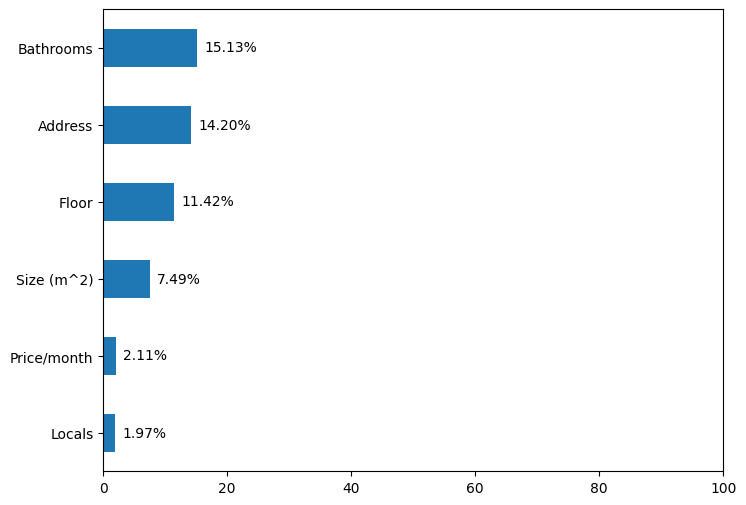

In [40]:
def percent_missing_values(df):
    total_missing = df.isnull().sum() + (df == "").sum()
    total_cells = df.shape[0]
    missing_percentage = (total_missing / total_cells) * 100
    return missing_percentage

missing_percentages = percent_missing_values(integrated_df[["Price/month", "Size (m^2)", "Locals", "Bathrooms", "Floor", "Address"]])
missing_percentages = missing_percentages.sort_values(ascending=True)

plt.figure(figsize=(8, 6))
bars = missing_percentages.plot(kind='barh')

plt.xlim(0, 100)

for bar in bars.patches:
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2

    label = f'{x:.2f}%'

    if x < 20:
        plt.annotate(label, (x, y), xytext=(5, 0), textcoords='offset points', va='center')
    else:
        plt.annotate(label, (x, y), xytext=(-10, 0), textcoords='offset points', ha='right', va='center')

plt.show()

###RICONOSCIMENTO VIE

In [ ]:
seed = 957515
pd.set_option('display.max_colwidth', None)
integrated_df_sample = integrated_df.sample(n=33, random_state=seed)
columns_to_display = ['Title', 'Description', 'Address']
integrated_df_sample[columns_to_display]

,Title,Description,Address
2279,"Trilocale via Spartaco, Montenero, Milano","Rif 10218\n\nNei pressi di VIA VIALE MONTENERO in zona PORTA VITTORIA comodo ai servizi e ai mezzi pubblici, si propone trilocale di circa 60mq. In stabile bene abitato e decoroso,\n\nLIBERO da subito ed in ottime condizioni interne, si propone ampio trilocale sito al TERZO piano con ASCENSORE.\n\nL'appartamento si presenta in ottime condizioni ed ha una buona suddivisione degli spazi interni.\n\nL'ingresso è ampio e luminoso con adiacente la cucina abitabile con balcone, ampio salone, una camera da letto matrimoniale il bagno è finestrato con doccia, completamente ARREDATO\n\nRICHIESTA DI EURO 1700 SPESE COMPRESE\n LIBERO SUBITO!!!!\n\nAffitto privato non è un'agenzia immobiliare non svolge attività di mediazione. E' un'inserzionista che offre un servizio informativo di accesso ad una banca dati, cont",via spartaco
2607,"Bilocale via Broletto, Duomo, Milano","Via Broletto, trilocale di pregio a due passi dal Duomo e dal Castello Sforzesco, composto da due camere e due bagni completi, tripla esposizione e portineria tutto il giorno. \nLuminosissimo trilocale al quinto piano con doppio affaccio interno, metratura di circa 100 mq, grande camera da letto matrimoniale con bagno interno finestrato con vasca da bagno e doccia, una camera singola (con possibilitÃ di secondo letto) con angolo studio/lavoro e un secondo bagno finestrato con ampia doccia. Completano la proprietÃ una grande cucina abitabile con balcone da cui si vede il Duomo e un soggiorno doppio con zona pranzo e balcone da cui ammirare il Castello Sforzesco . Il palazzo Ã¨ dotato di doppio ascensore e di portineria per l'intera giornata.\nIl quartiere prende il nome dal simbolo piÃ¹ imp",via broletto
1661,"Bilocale via Carmagnola,1, Isola, Milano","[ITA] Disponibile da: 08/07/2023\nPrenota online: https://roomlessrent.com/it/rent-listing/92467\n[ENG] Available from: 08/07/2023\nBook it online: https://roomlessrent.com/en/rent-listing/92467\n\nMensilità minime prenotabili: 1\nMensilità massime prenotabili: 12\nEtà accettata: Nessuna preferenza\nMinimum months rental: 1\nMaximum months rental: 12\nAccepted age: No preference\n\n[ITA] COME FUNZIONA ROOMLESS?\nRoomless è una piattaforma online per affitti a medio-lungo termine che nasce come garanzia per l’inquilino: verifichiamo tutti gli appartamenti e le foto sono recenti ed affidabili quindi puoi evitare la visita e prenotare online nella massima tranquillità per evitare che qualcuno lo faccia prima di te.\nPer prenotare online, segui il link sopra e clicca su “affitta subito”.\nSe hai bisogno di a",via carmagnola
3,Nuovo bilocale tutto incluso a 850 euro - Bovisa,"In una zona ben fornita da beni di prima e seconda necessità, a pochi passi dal passante ferroviario e da vari mezzi di superficie, proponiamo in affitto appartamento di 50 mq situato al primo piano di una palazzina SIGNORILE. L'appartamento si presenta in OTTIME condizioni e COMPLETAMENTE arredato ed è così composto: - un ingresso su disimpegno con PORTA BLINDATA, - un soggiorno dotato di una tv smart, un divano e un tavolo con sedie, - un angolo cottura fornito di tutti gli elettrodomestici necessari, - una camera da letto MATRIMONIALE con armadio ad ante specchiato, - un AMPIO balcone VIVIBILE, - un bagno LUMINOSO e FINESTRATO con box doccia. Il riscaldamento è CENTRALIZZATO, COMPRESO NELLE SPESE. Il canone mensile ammonta ad euro 850,00 COMPRENSIVO di spese condominiali. Rif: 29513 CHIAMACI SENZA IMPEGNO E PER INFORMAZIONI!! 3273394857 - 3271850223 E SE VOLESSI PASSARE SIAMO IN VIA SANT'ERLEMBALDO 1 - GORLA, MILANO TI ASPETTIAMO! Trova Affitto non è un agenzia immobiliare. È un inserzionista che offre un servizio informativo di accesso ad una banca dati contente offerte immobiliari di proprietari reperibili gratuitamente anche su altri portali. Non ci sono costi di mediazione ma un'unica quota per usufruire dei servizi.",via santerlembaldo
679,BILOCALE CON TERRAZZO,"In Via Smar

 29/33 | 31/33 | 27/33 ==> 0.88%

In [ ]:
pd.reset_option('display.max_colwidth')